### Student Information
Name: Visharad Kashyap

Student ID: F74148426

GitHub ID: vishxrad

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
# from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Visharad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
reddit_stock = pd.read_csv("newdataset\Reddit-stock-sentiment.csv")
reddit_stock.tail(5)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.0,0.0,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.0,0.0,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0,0.0,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.0,0.0,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0
846,comment,2025-04-12 3:09:06,mmobyz1,wallstreetbets,Someone post the hotline please.,I_am_Nerman,https://i.redd.it/tcfuu97p7bue1.jpeg,1,NaN,NaN,![img](emote|t5_2th52|31224),0.0,0.0,0.0,"['img', ']', '[', 'emote|t5_2th52|31224']",0.0


In [3]:
reddit_stock= reddit_stock.drop(columns=['post_id', 'url', 'downvotes', 'upvote_ratio', 'subjectivity', 'polarity', 'sentiment', 'entities'])
reddit_stock.tail(5)

,type,datetime,subreddit,title,author,upvotes,text,label
842,comment,2021-06-30 4:06:06,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,1,Invest now it is going to shoot up tomorrow,1.0
843,comment,2025-04-11 5:01:24,StockMarket,$ U.S. dollar value (crashing),lulububudu,2,Where can I read this?,0.0
844,post,2025-03-24 12:30:39,stockstobuytoday,Analyst Recommendations,saasfin,1,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0
845,comment,2025-04-11 20:13:26,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,10,i sold my puts so i expect cheeto to declare w...,-1.0
846,comment,2025-04-12 3:09:06,wallstreetbets,Someone post the hotline please.,I_am_Nerman,1,![img](emote|t5_2th52|31224),0.0


In [4]:
reddit_stock.keys()

Index(['type', 'datetime', 'subreddit', 'title', 'author', 'upvotes', 'text',
       'label'],
      dtype='object')

In [5]:
subreddits = list(set(reddit_stock["subreddit"]))
subreddits

['wallstreetbets', 'StockMarket', 'stockstobuytoday', 'stocks']

Exercise 1

In [7]:
for i in range(3):
    print(f"Text {i+1}:")
    print(reddit_stock.iloc[0])
    print("------------------------------------------------------------")


Text 1:
type                                                 comment
datetime                                 2025-04-11 17:29:56
subreddit                                     wallstreetbets
title        Retardation is on the menu boys! WSB is so back
author                                          StickyTip420
upvotes                                                    0
text                                        Calls on retards
label                                                   -1.0
Name: 0, dtype: object
------------------------------------------------------------
Text 2:
type                                                 comment
datetime                                 2025-04-11 17:29:56
subreddit                                     wallstreetbets
title        Retardation is on the menu boys! WSB is so back
author                                          StickyTip420
upvotes                                                    0
text                                        Ca

Exercise 2

In [8]:
reddit_stock[reddit_stock['upvotes'] >= 100].head(10)

,type,datetime,subreddit,title,author,upvotes,text,label
42,comment,2021-02-01 13:45:17,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,3943,So they went from saying redditors are bad for...,1.0
93,comment,2025-04-10 14:58:22,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,dancness,294,1. Make middle class homeless by causing hype...,-1.0
164,comment,2025-04-11 13:58:46,StockMarket,The Trump administration is begging Xi Jinping...,SingularityCentral,125,The bond market is also begging for that call....,0.0
324,comment,2025-04-11 8:36:53,stocks,BREAKING: China raises tariffs on U.S. goods t...,Dependent-Hurry9808,338,They’re going to start selling our treasury bonds,0.0
497,post,2025-04-11 2:58:02,stocks,U.S. 10-year Treasury yields rise as Trump tar...,Fidler_2K,1105,\r\n\r\n> The 10-year Treasury yield climbed 6...,0.0
594,post,2024-01-16 15:32:36,stockstobuytoday,Looking into the graphite industry!,TheSpectacularOracle,131,Hey guys! I was doing some research on the gra...,0.0
721,comment,2025-04-11 3:04:56,stocks,U.S. 10-year Treasury yields rise as Trump tar...,Apprehensive-Draw-10,121,I don't think that would do it because he coul...,0.0
764,comment,2025-04-10 14:54:59,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,NonStickyStickyNote,276,The real question is: Why does he want to fire...,0.0


Exercise 3 (Try to fetch records belonging to the ```wallstreetbets``` subreddit, and query every 10th record. Only show the first 5 records.)

In [9]:
reddit_stock[reddit_stock['subreddit'] == 'wallstreetbets'].head(5)

,type,datetime,subreddit,title,author,upvotes,text,label
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,0,Calls on retards,-1.0
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,Stunt as in like why did they even make a big ...,0.0
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,16,"Hoping to ejaculate in wet warm puss tonight, ...",0.0
7,comment,2025-04-11 17:28:50,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,-3,Confirmed not a trap. Its been like this for p...,0.0
11,comment,2025-04-12 2:51:20,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,RememberTooSmile,9,"this sub has ruined emails for me, whenever I ...",0.0


Exercise 4

In [10]:
from helpers import data_mining_helpers as dmh
reddit_stock.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

Exercise 5 (copied from Master.ipynb since the content is the same)

In [11]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [12]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [13]:
# Answer here
"""
0: Got True since for 'isnull()' since using 'np.nan' as the value for the key 'missing_example' assigns it a null value. 
1: Since there is no key-value pair, we automatically get null since the value doesn't exist.
2: Even though we supposedly put 'NaN' as the value but since it was a string, it was not null and hence we got False.
3: Same as the previous, 'None' is used as a string and hence we get False when using 'isnull()'.
4: Since None is a keyword in python with the value null, we get True.
5: Even though the value is blank, it still exists in the form of an empty string and hence is not null, giving us a false.
""" 

"\n0: Got True since for 'isnull()' since using 'np.nan' as the value for the key 'missing_example' assigns it a null value. \n1: Since there is no key-value pair, we automatically get null since the value doesn't exist.\n2: Even though we supposedly put 'NaN' as the value but since it was a string, it was not null and hence we got False.\n3: Same as the previous, 'None' is used as a string and hence we get False when using 'isnull()'.\n4: Since None is a keyword in python with the value null, we get True.\n5: Even though the value is blank, it still exists in the form of an empty string and hence is not null, giving us a false.\n"

In [14]:
X = reddit_stock.sample(n=50)
len(X)

50

In [15]:
X[:10]

,type,datetime,subreddit,title,author,upvotes,text,label
209,comment,2025-04-11 21:01:42,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,Worth_Swim_3128,9,Short America right now,1.0
657,comment,2025-04-11 4:34:22,StockMarket,Data Shows US Allies—Not China—Dumping Treasuries,FencingSquirrelz,1,"Whoops, thanks.",0.0
670,comment,2024-12-28 13:24:27,stockstobuytoday,$ARTW Could be the next big runner in small caps,Quiet_Reputation_128,2,The agriculture sector should boom under this ...,1.0
288,comment,2021-10-27 18:21:08,stockstobuytoday,"$FCEL, $PLUG $LCID daily tickets",saasfin,1,$UAA,0.0
220,comment,2025-04-11 16:02:45,stocks,US consumer sentiment plummets to second-lowes...,FinalBossKiwi,1,I'm employed doing well with no debt but there...,0.0
13,comment,2025-03-04 23:49:37,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,Miramarmechanic,2,"\r\nI’ve been doing pretty good with this, but...",0.0
34,comment,2021-02-01 13:45:52,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,1,So they went from saying redditors are bad for...,1.0
235,comment,2025-04-11 10:59:08,StockMarket,🚨China responds to Trump’s 145% tariff with an...,eagermoron,12,6969% tariffs or riot.,0.0
218,comment,2025-04-11 15:52:25,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,Lets_Kick_Some_Ice,3,Depression is already priced in.,-1.0
712,post,2025-04-01 9:01:38,stockstobuytoday,World Markets,AutoModerator,1,\r\n\r\n [World Markets (stockbuyvest.com)](),0.0


In [16]:
len(reddit_stock)

847

In [17]:
reddit_stock[:10]

,type,datetime,subreddit,title,author,upvotes,text,label
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,0,Calls on retards,-1.0
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,Stunt as in like why did they even make a big ...,0.0
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,Btankersly66,1,Seeing lots of red in the ticker.,0.0
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,emiljenfn,30,Vision Marine Technologies Inc. is rewriting t...,1.0
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,1,He didn’t say thank you.,-1.0
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,16,"Hoping to ejaculate in wet warm puss tonight, ...",0.0
6,comment,2025-04-11 12:37:23,stocks,Is the market in complete denial right now?,stoniey84,5,Trump will respond to china increasing their t...,-1.0
7,comment,2025-04-11 17:28:50,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,-3,Confirmed not a trap. Its been like this for p...,0.0
8,comment,2021-02-01 15:36:32,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,1,Am I the only one seeing the cup & handle brea...,1.0
9,comment,2021-12-31 16:29:49,stockstobuytoday,Any cheap stocks under $10?,Zumuru,2,HLGN is $10. Hurry and catch it now before it ...,1.0


Exercise 6

In [18]:
# Answer here
"""
X is exactly 50 rows long whereas reddit_stock is 847 rows long.
Apart from the size, enteries in X_sample are arranged in a random order, where as they are arranged in an ascending order (based upon their serial numbers).
"""

'\nX is exactly 50 rows long whereas reddit_stock is 847 rows long.\nApart from the size, enteries in X_sample are arranged in a random order, where as they are arranged in an ascending order (based upon their serial numbers).\n'

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='subreddit'>

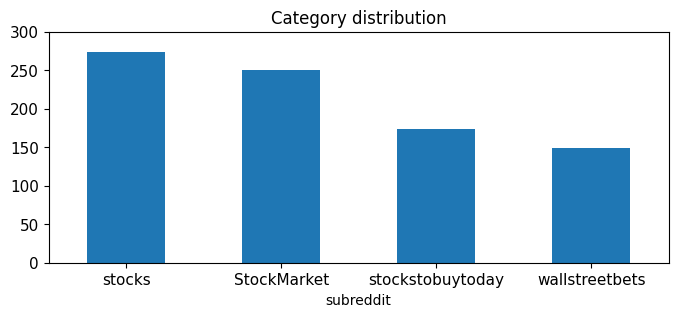

In [32]:
print(reddit_stock.subreddit.value_counts())

# plot barchart for X
reddit_stock.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 300],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

Exercise 7

subreddit
StockMarket         15
stocks              15
stockstobuytoday    12
wallstreetbets       8
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='subreddit'>

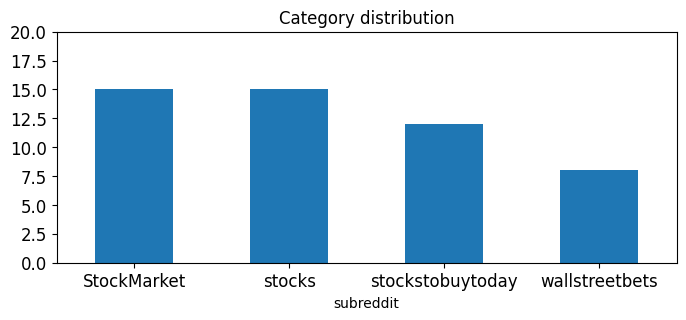

In [36]:
# Answer here
print(X.subreddit.value_counts())

# plot barchart for X_sample
X.subreddit.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, X.subreddit.value_counts().max()+5], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

Exercise 8

                  subreddit  subreddit
subreddit                             
stocks                  274         15
StockMarket             250         15
stockstobuytoday        174         12
wallstreetbets          149          8


<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

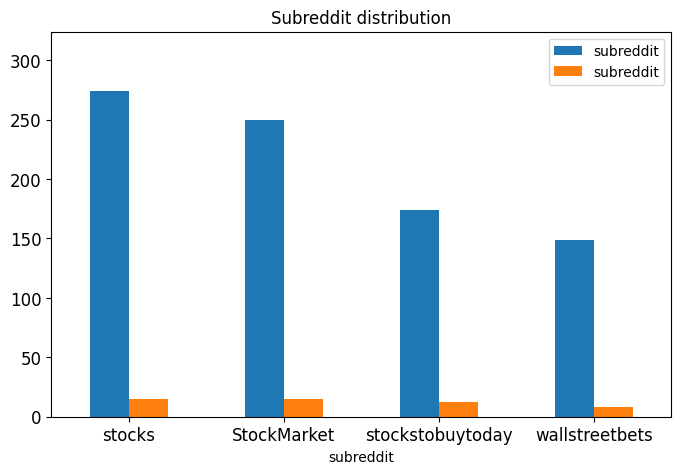

In [39]:
# Answer here

chart = pd.concat([reddit_stock['subreddit'].value_counts(), X['subreddit'].value_counts()], keys=['subreddit', 'subreddit'], axis=1)
print(chart)
chart.plot(kind = 'bar',
            title = 'Subreddit distribution',
            ylim = [0, chart.values.max()+50], 
            rot = 0, fontsize = 12, figsize = (8,5))

In [40]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Visharad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Visharad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [41]:
# takes a like a minute or two to process

reddit_stock['unigrams'] = reddit_stock['text'].apply(lambda reddit_stock: dmh.tokenize_text(reddit_stock))

In [43]:
reddit_stock[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [48]:
list(reddit_stock[1:2]['unigrams'])

[['Stunt',
  'as',
  'in',
  'like',
  'why',
  'did',
  'they',
  'even',
  'make',
  'a',
  'big',
  'deal',
  'about',
  'starting',
  'it',
  'in',
  'the',
  'first',
  'place',
  '?',
  'No',
  'company',
  'should',
  'ever',
  'talk',
  'about',
  'politics',
  'ever',
  '.']]

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
R_counts = count_vect.fit_transform(reddit_stock.text) #learn the vocabulary and return document-term matrix
print(R_counts[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


In [ ]:
count_vect.get_feature_names_out()[1000:1005]

array(['crashes', 'crashing', 'crayola', 'crayon', 'crazy'], dtype=object)

In [53]:
len(count_vect.get_feature_names_out())

4346

In [54]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

Exercise 9

In [56]:
analyze(reddit_stock["text"][0])

['calls', 'on', 'retards']

In [58]:
R_counts.shape

(847, 4346)

In [59]:
print(R_counts[0:5, 0:100])

  (np.int32(3), np.int32(18))	3


In [64]:
R_counts[5:10, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

Exercise 10

In [67]:
record_indices = np.where(R_counts[9].toarray()[0] == 1)[0]
index = record_indices[8] # This will be 37
count_vect.get_feature_names_out()[index]

'now'

# Phase 2

In [ ]:
### Begin Assignment Here